## Installation

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf 
print(tf.__version__)

1.15.2


In [3]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2282, done.
remote: Counting objects: 100% (2282/2282), done.
remote: Compressing objects: 100% (1975/1975), done.
remote: Total 2282 (delta 559), reused 962 (delta 281), pack-reused 0
Receiving objects: 100% (2282/2282), 30.55 MiB | 28.75 MiB/s, done.
Resolving deltas: 100% (559/559), done.


In [4]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf1/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1597018 sha256=d3a45032f6d12b509130e36d8f4d21fa5c535607b7b0d49766895a6d0201a932
  Stored in directory: /tmp/pip-ephem-wheel-cache-2gzbvaf1/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection


In [5]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf1_test.py

Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[       OK ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_model_from_config_wi

## Downloading model

In [6]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
!tar -xvf ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz

--2020-10-30 17:01:02--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.195.128, 2607:f8b0:4001:c11::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144806142 (138M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’

ssd_mobilenet_v2_qu 100%[===================>] 138.10M   235MB/s    in 0.6s    

2020-10-30 17:01:02 (235 MB/s) - ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’ saved [144806142/144806142]

ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/
ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/model.ckpt.data-00000-of-00001
ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/model.ckpt.index
ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/model.ckpt.meta
ssd_mobilenet_v2_quantize

In [7]:
!ls -lah ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/

total 204M
drwx------ 2 303230 5000 4.0K Jan  4  2019 .
drwxr-xr-x 1 root   root 4.0K Oct 30 17:01 ..
-rw------- 1 303230 5000  93M Jan  4  2019 model.ckpt.data-00000-of-00001
-rw------- 1 303230 5000  68K Jan  4  2019 model.ckpt.index
-rw------- 1 303230 5000  20M Jan  4  2019 model.ckpt.meta
-rw------- 1 303230 5000 4.3K Jan  4  2019 pipeline.config
-rw------- 1 303230 5000  24M Jan  4  2019 tflite_graph.pb
-rw------- 1 303230 5000  68M Jan  4  2019 tflite_graph.pbtxt


## Export a TFLite compatible model graph 

In [8]:
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
    --pipeline_config_path ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/pipeline.config \
    --trained_checkpoint_prefix ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/model.ckpt \
    --output_directory tflite/ \
    --add_postprocessing_op=true

Instructions for updating:
Please use `layer.__call__` method instead.
W1030 17:01:09.200190 140592137967488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1030 17:01:11.676344 140592137967488 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1030 17:01:11.710011 140592137967488 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1030 17:01:11.743658 140592137967488 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [9]:
!ls -lah tflite

total 92M
drwxr-xr-x 2 root root 4.0K Oct 30 17:01 .
drwxr-xr-x 1 root root 4.0K Oct 30 17:01 ..
-rw-r--r-- 1 root root  24M Oct 30 17:01 tflite_graph.pb
-rw-r--r-- 1 root root  68M Oct 30 17:01 tflite_graph.pbtxt


## Convert model to Tensorflow Lite

In [10]:
!tflite_convert \
  --output_file tflite/tflite_graph.tflite \
  --graph_def_file tflite/tflite_graph.pb \
  --inference_type QUANTIZED_UINT8 \
  --input_arrays normalized_input_image_tensor \
  --output_arrays TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 \
  --mean_values 128 \
  --std_dev_values 128 \
  --input_shapes 1,300,300,3 \
  --change_concat_input_ranges false \
  --allow_nudging_weights_to_use_fast_gemm_kernel true \
  --allow_custom_ops

2020-10-30 17:01:24.674458: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-30 17:01:24.683592: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-10-30 17:01:24.683644: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1514fce1c945): /proc/driver/nvidia/version does not exist
2020-10-30 17:01:24.689336: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-10-30 17:01:24.689614: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x22bea00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-10-30 17:01:24.689651: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [11]:
!ls -lah tflite

total 98M
drwxr-xr-x 2 root root 4.0K Oct 30 17:01 .
drwxr-xr-x 1 root root 4.0K Oct 30 17:01 ..
-rw-r--r-- 1 root root  24M Oct 30 17:01 tflite_graph.pb
-rw-r--r-- 1 root root  68M Oct 30 17:01 tflite_graph.pbtxt
-rw-r--r-- 1 root root 5.9M Oct 30 17:01 tflite_graph.tflite


## Run inference of Tensorflow Lite model

In [12]:
!wget -O dog.jpg https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg

--2020-10-30 17:01:29--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129862 (127K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 126.82K  --.-KB/s    in 0.03s   

2020-10-30 17:01:29 (3.61 MB/s) - ‘dog.jpg’ saved [129862/129862]



In [13]:
# based on https://github.com/tensorflow/examples/blob/master/lite/examples/object_detection/raspberry_pi/detect_picamera.py

from PIL import Image, ImageDraw, ImageFont
import re, glob
from six import BytesIO
import numpy as np


def draw_image(image, results, size):
    result_size = len(results)
    for idx, obj in enumerate(results):
        # Prepare image for drawing
        draw = ImageDraw.Draw(image)

        # Prepare boundary box
        xmin, ymin, xmax, ymax = obj['bounding_box']
        xmin = int(xmin * size[1])
        xmax = int(xmax * size[1])
        ymin = int(ymin * size[0])
        ymax = int(ymax * size[0])

        # Draw rectangle to desired thickness
        for x in range( 0, 4 ):
            draw.rectangle((ymin, xmin, ymax, xmax), outline=(255, 255, 0), width=5)

    displayImage = np.asarray( image )
    display(Image.fromarray(displayImage))

def load_labels(path):
    """Loads the labels file. Supports files with or without index numbers."""
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        labels = {}
        for row_number, content in enumerate(lines):
            pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
            if len(pair) == 2 and pair[0].strip().isdigit():
                labels[int(pair[0])] = pair[1].strip()
            else:
                labels[row_number] = pair[0].strip()
    return labels

def set_input_tensor(interpreter, image):
    """Sets the input tensor."""
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
    """Returns the output tensor at the given index."""
    output_details = interpreter.get_output_details()[index]
    tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
    return tensor


def detect_objects(interpreter, image, threshold):
    """Returns a list of detection results, each a dictionary of object info."""
    set_input_tensor(interpreter, image)
    interpreter.invoke()

    # Get all output details
    boxes = get_output_tensor(interpreter, 0)
    classes = get_output_tensor(interpreter, 1)
    scores = get_output_tensor(interpreter, 2)
    count = int(get_output_tensor(interpreter, 3))

    results = []
    for i in range(count):
        if scores[i] >= threshold:
            result = {
                'bounding_box': boxes[i],
                'class_id': classes[i],
                'score': scores[i]
            }
            results.append(result)
    return results

In [14]:
interpreter = tf.lite.Interpreter(model_path="tflite/tflite_graph.tflite")
interpreter.allocate_tensors()
_, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

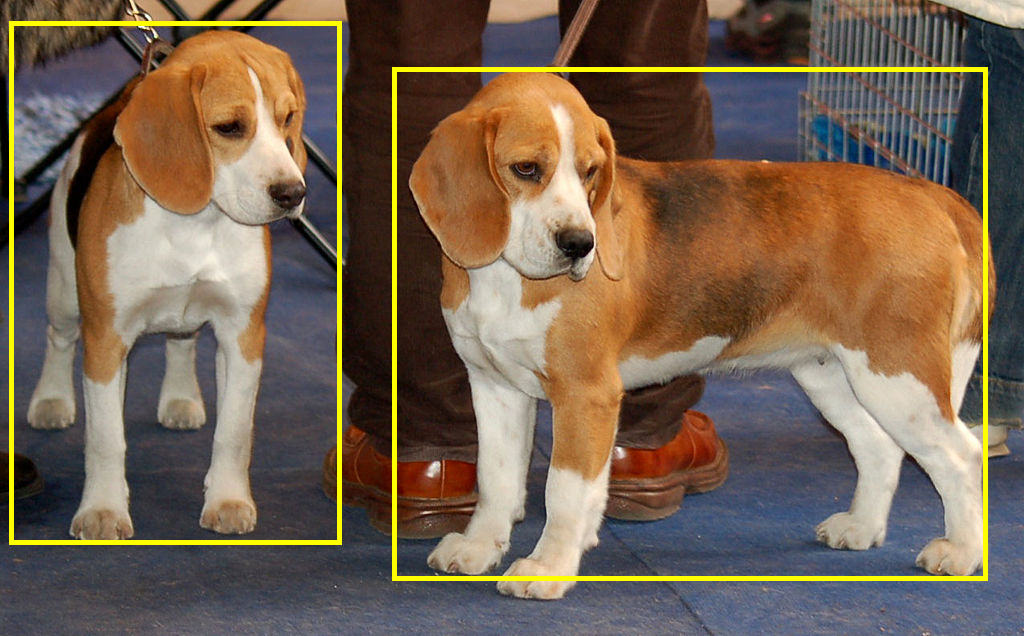

In [15]:
image = Image.open('dog.jpg')
image_pred = image.resize((input_width ,input_height), Image.ANTIALIAS)
results = detect_objects(interpreter, image_pred, 0.5)

draw_image(image, results, image.size)